## import the dependencies

In [1]:
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

## generate a toy dataset with only two features and three label classes

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,
                  cluster_std=2, random_state=2)

## One-hot-encode the label

In [3]:
y = to_categorical(y)

In [4]:
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

## Split the dataset into training data and test data

In [5]:
n_train = 800
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_Y, test_Y = y[:n_train], y[n_train:]

print(train_X.shape, test_X.shape)

(800, 2) (200, 2)


## Develop the model architecture:

In [6]:
def get_model():
    mdl = Sequential()
    mdl.add(Dense(25, input_dim=2, activation='relu'))
    mdl.add(Dense(3, activation='softmax'))
    
    return mdl

In [7]:
model = get_model()

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 78        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


## train the model for 1_000 epochs:

In [9]:
history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y),
                    epochs=1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 1s 7ms/step - loss: 1.0667 - accuracy: 0.3750 - val_loss: 0.9103 - val_accuracy: 0.3950
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.9006 - accuracy: 0.4613 - val_loss: 0.8108 - val_accuracy: 0.5450
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.8212 - accuracy: 0.5738 - val_loss: 0.7449 - val_accuracy: 0.6850
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7700 - accuracy: 0.6413 - val_loss: 0.6969 - val_accuracy: 0.7300
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7321 - accuracy: 0.6700 - val_loss: 0.6647 - val_accuracy: 0.7400
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.6850 - val_loss: 0.6386 - val_accuracy: 0.7550
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.7000 - val_loss: 0.6196 - val_accuracy: 0.7700
Epoch 

## Evaluate the model

In [12]:
_, train_acc = model.evaluate(train_X, train_Y)
_, test_acc = model.evaluate(test_X, test_Y)

print('Train:', train_acc, "Test:", test_acc)

7/7 [==============================] - 0s 4ms/step - loss: 0.3697 - accuracy: 0.8450
Train: 0.8324999809265137 Test: 0.8450000286102295


## Plot the learing curves of model accuracy

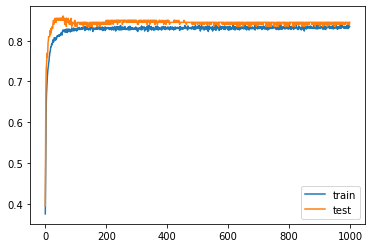

In [13]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

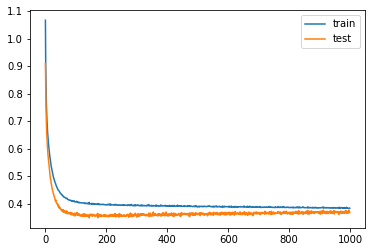

In [14]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()